<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_cluster_data_multi_delta_(1_2)_n20_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_1.2'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_1.2_n20.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,27.014507,36.748281,76.172083,-2.585454,147.349417,151.260166,-3.910750
1,0.0,1.0,54.184983,68.692260,80.434445,10.790191,224.101879,212.747007,11.354873
2,0.0,2.0,74.815752,67.254373,79.013553,-3.089721,227.993956,227.645593,0.348363
3,0.0,3.0,86.067168,59.493031,21.920035,26.271482,203.751715,179.822243,23.929472
4,0.0,4.0,77.644617,32.281041,38.640408,0.586000,159.152066,157.548207,1.603859
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,65.428637,31.043319,58.527285,6.263178,171.262420,172.170094,-0.907674
19996,999.0,16.0,59.848544,88.267793,90.588043,0.144942,248.849323,248.521688,0.327634
19997,999.0,17.0,95.074489,20.982394,70.948616,12.162555,209.168054,207.167636,2.000418
19998,999.0,18.0,31.473663,61.754588,51.166493,11.588973,165.983716,155.756908,10.226808


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat      e_hat
rep   index                                   ...                                   
0.0   0.0    27.014507  36.748281  76.172083  ...  147.349417  151.260166  -3.910750
      1.0    54.184983  68.692260  80.434445  ...  224.101879  212.747007  11.354873
      2.0    74.815752  67.254373  79.013553  ...  227.993956  227.645593   0.348363
      3.0    86.067168  59.493031  21.920035  ...  203.751715  179.822243  23.929472
      4.0    77.644617  32.281041  38.640408  ...  159.152066  157.548207   1.603859
...                ...        ...        ...  ...         ...         ...        ...
999.0 15.0   65.428637  31.043319  58.527285  ...  171.262420  172.170094  -0.907674
      16.0   59.848544  88.267793  90.588043  ...  248.849323  248.521688   0.327634
      17.0   95.074489  20.982394  70.948616  ...  209.168054  207.167636   2.000418
      18.0   31.473663  61.754588  51.166493  ...  165.983716  155.756908  10.226808
      19.0   82.677852  34.343922  69.682362  ...  199.478113  204.482288  -5.004176

[20000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat      e_hat
rep   index                                   ...                                   
0.0   0.0    27.014507  36.748281  76.172083  ...  147.349417  151.260166  -3.910750
      1.0    54.184983  68.692260  80.434445  ...  224.101879  212.747007  11.354873
      2.0    74.815752  67.254373  79.013553  ...  227.993956  227.645593   0.348363
      3.0    86.067168  59.493031  21.920035  ...  203.751715  179.822243  23.929472
      4.0    77.644617  32.281041  38.640408  ...  159.152066  157.548207   1.603859
...                ...        ...        ...  ...         ...         ...        ...
999.0 15.0   65.428637  31.043319  58.527285  ...  171.262420  172.170094  -0.907674
      16.0   59.848544  88.267793  90.588043  ...  248.849323  248.521688   0.327634
      17.0   95.074489  20.982394  70.948616  ...  209.168054  207.167636   2.000418
      18.0   31.473663  61.754588  51.166493  ...  165.983716  155.756908  10.226808
      19.0   82.677852  34.343922  69.682362  ...  199.478113  204.482288  -5.004176

[20000 rows x 7 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,27.014507,36.748281,76.172083,-2.585454,147.349417,151.260166,-3.910750
1,0.0,1.0,54.184983,68.692260,80.434445,10.790191,224.101879,212.747007,11.354873
2,0.0,2.0,74.815752,67.254373,79.013553,-3.089721,227.993956,227.645593,0.348363
3,0.0,3.0,86.067168,59.493031,21.920035,26.271482,203.751715,179.822243,23.929472
4,0.0,4.0,77.644617,32.281041,38.640408,0.586000,159.152066,157.548207,1.603859
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,65.428637,31.043319,58.527285,6.263178,171.262420,172.170094,-0.907674
19996,999.0,16.0,59.848544,88.267793,90.588043,0.144942,248.849323,248.521688,0.327634
19997,999.0,17.0,95.074489,20.982394,70.948616,12.162555,209.168054,207.167636,2.000418
19998,999.0,18.0,31.473663,61.754588,51.166493,11.588973,165.983716,155.756908,10.226808


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3  ...           Y       y_hat      e_hat
rep   index                                   ...                                   
0.0   0.0    27.014507  36.748281  76.172083  ...  147.349417  151.260166  -3.910750
      1.0    54.184983  68.692260  80.434445  ...  224.101879  212.747007  11.354873
      2.0    74.815752  67.254373  79.013553  ...  227.993956  227.645593   0.348363
      3.0    86.067168  59.493031  21.920035  ...  203.751715  179.822243  23.929472
      4.0    77.644617  32.281041  38.640408  ...  159.152066  157.548207   1.603859
...                ...        ...        ...  ...         ...         ...        ...
999.0 15.0   65.428637  31.043319  58.527285  ...  171.262420  172.170094  -0.907674
      16.0   59.848544  88.267793  90.588043  ...  248.849323  248.521688   0.327634
      17.0   95.074489  20.982394  70.948616  ...  209.168054  207.167636   2.000418
      18.0   31.473663  61.754588  51.166493  ...  165.983716  155.756908  10.226808
      19.0   82.677852  34.343922  69.682362  ...  199.478113  204.482288  -5.004176

[20000 rows x 7 columns]

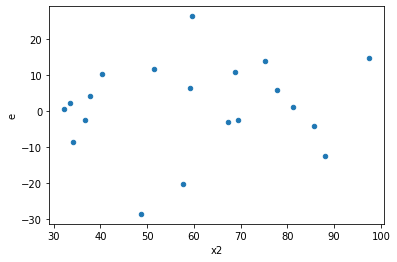

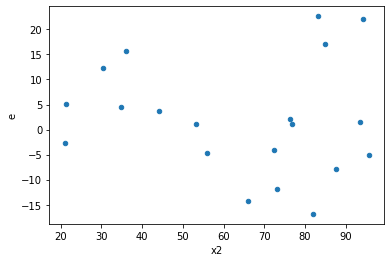

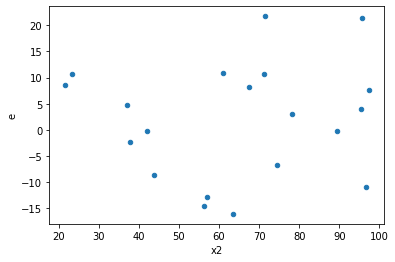

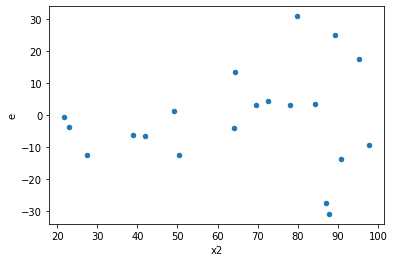

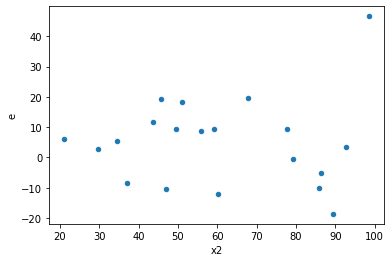

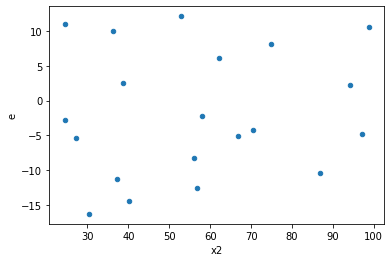

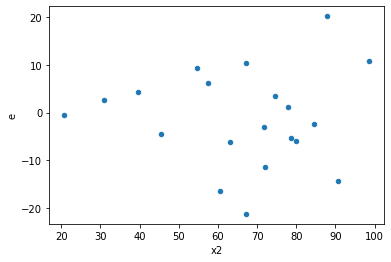

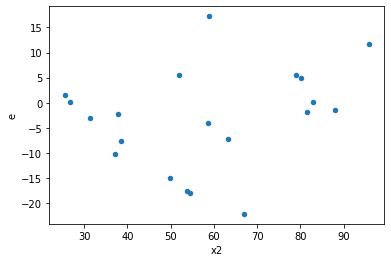

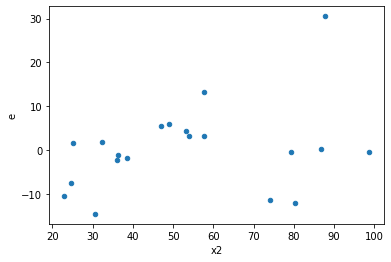

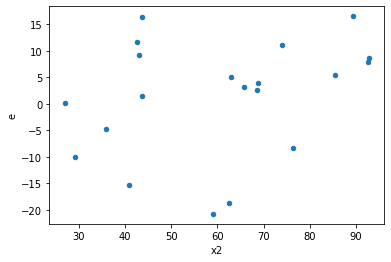

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2", "x3"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,6.0,8.0,460.7100822269486,1375.6692206060918,76.78501370449143,171.95865257576148,2.2394819546109295,0.2884643919975103,0.8557678040012449,0.14423219599875514,Reject001=1 : Homoscedasticity
8.0,8.0,6.0,139.05938415696474,1014.5096443634616,17.382423019620592,169.0849407272436,9.727351620449417,0.012441535306747964,0.993779232346626,0.006220767653373982,Reject001=1 : Homoscedasticity
10.0,9.0,5.0,520.7084400455111,608.3684851754891,57.85649333839012,121.67369703509783,2.1030257800702623,0.42745457010576304,0.7862727149471185,0.21372728505288152,Reject001=1 : Homoscedasticity
11.0,7.0,7.0,165.05923057879235,1145.9775170396447,23.57989008268462,163.7110738628064,6.9428259965903765,0.020409842936834455,0.9897950785315828,0.010204921468417227,Reject001=1 : Homoscedasticity
12.0,4.0,10.0,194.56352124096793,1103.1060177743232,48.64088031024198,110.31060177743231,2.2678578404388983,0.267798953169186,0.866100523415407,0.133899476584593,Reject001=1 : Homoscedasticity
13.0,7.0,7.0,252.18185469200822,1006.7780848148846,36.02597924171546,143.82544068784065,3.9922701260345272,0.08803687111546976,0.9559815644422651,0.04401843555773488,Reject001=1 : Homoscedasticity
16.0,5.0,9.0,292.6515314789332,924.5637007217305,58.53030629578664,102.72930008019227,1.75514714652343,0.43653712587889393,0.781731437060553,0.21826856293944696,Reject001=1 : Homoscedasticity
17.0,9.0,5.0,560.1916101875221,672.5019598994315,62.24351224305801,134.5003919798863,2.1608740755931084,0.4101351422092723,0.7949324288953639,0.20506757110463614,Reject001=1 : Homoscedasticity
18.0,10.0,4.0,334.41597136273964,1144.5970311961246,33.44159713627396,286.14925779903115,8.556686351820387,0.053057643933016374,0.9734711780334918,0.026528821966508187,Reject001=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,9.0,5.0,1307.8925322002733,503.32138378392443,145.32139246669703,100.66427675678489,0.6927010197748682,0.594902089086815,Reject001=1 : Homoscedasticity
1.0,6.0,8.0,460.7100822269486,1375.6692206060918,76.78501370449143,171.95865257576148,2.2394819546109295,0.2884643919975103,Reject001=1 : Homoscedasticity
2.0,11.0,3.0,1139.3111608026863,24.893493484568218,103.5737418911533,8.297831161522739,0.08011520111190937,0.0014585951048007029,Reject001=0 : Heteroscedasticity
3.0,6.0,8.0,1770.560303132463,746.3545923862126,295.09338385541054,93.29432404827658,0.31615186633255327,0.1778176475789316,Reject001=1 : Homoscedasticity
4.0,7.0,7.0,2018.770613509901,940.0370027850435,288.39580192998585,134.29100039786334,0.4656482497289101,0.3347037091289609,Reject001=1 : Homoscedasticity
5.0,11.0,3.0,1040.2619082030806,136.54596718704326,94.56926438209824,45.51532239568109,0.4812908580083768,0.3227712370044553,Reject001=1 : Homoscedasticity
6.0,8.0,6.0,843.761964099159,515.8106302569333,105.47024551239487,85.96843837615556,0.8150965986521056,0.76701545065884,Reject001=1 : Homoscedasticity
7.0,7.0,7.0,544.3932324916566,293.15186023168974,77.77046178452237,41.878837175955674,0.5384928443910856,0.43288789806957034,Reject001=1 : Homoscedasticity
8.0,8.0,6.0,139.05938415696474,1014.5096443634616,17.382423019620592,169.0849407272436,9.727351620449417,0.012441535306747964,Reject001=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      898
Reject001=0 : Heteroscedasticity    102
Name: Result_test, dtype: int64